
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

<h2>Importacion de librerias</h2>

In [12]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

<h2>Carga de datos

In [13]:
# Cargar los datos de las tres regiones
data_region_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_region_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_region_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Mostrar una muestra de cada conjunto de datos
display(data_region_0.head(), data_region_1.head(), data_region_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen uso de _head_ para ver la estructura de los datos.

</div>

<h2>Inspeccionar datos</h2>

In [14]:
# Verificar la información general de cada conjunto de datos
print("Región 0:")
data_region_0.info()
print("\nRegión 1:")
data_region_1.info()
print("\nRegión 2:")
data_region_2.info()

# Comprobar valores faltantes y duplicados
print("\nValores faltantes y duplicados:")
print("Región 0: ", data_region_0.isnull().sum().sum(), " valores faltantes, ", data_region_0.duplicated().sum(), " duplicados")
print("Región 1: ", data_region_1.isnull().sum().sum(), " valores faltantes, ", data_region_1.duplicated().sum(), " duplicados")
print("Región 2: ", data_region_2.isnull().sum().sum(), " valores faltantes, ", data_region_2.duplicated().sum(), " duplicados")

Región 0:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Región 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Región 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 c

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Perfecto! No tenemos datos daltantes y podemos seguir con el análisis sin problema.

</div>

<h2>Visualizaci&oacute;n de las distribuciones</h2>

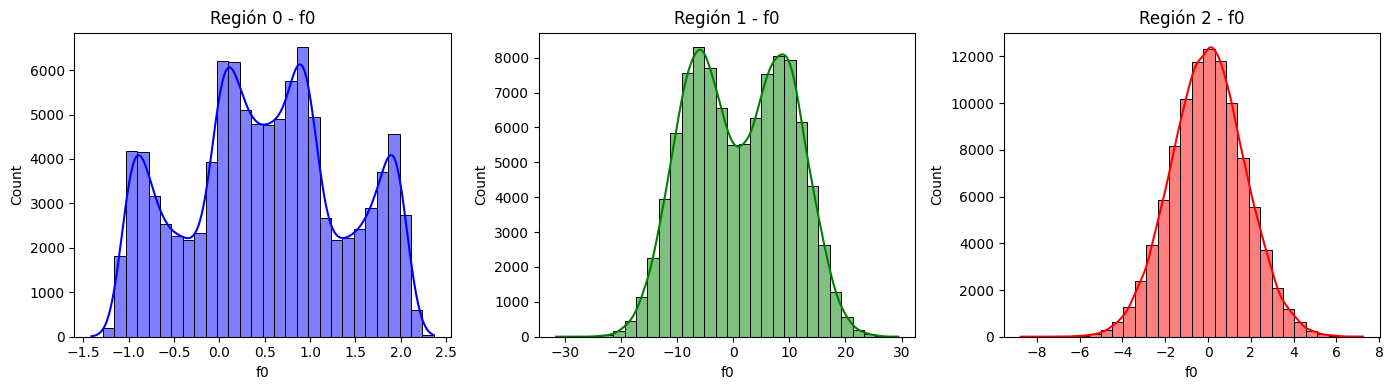

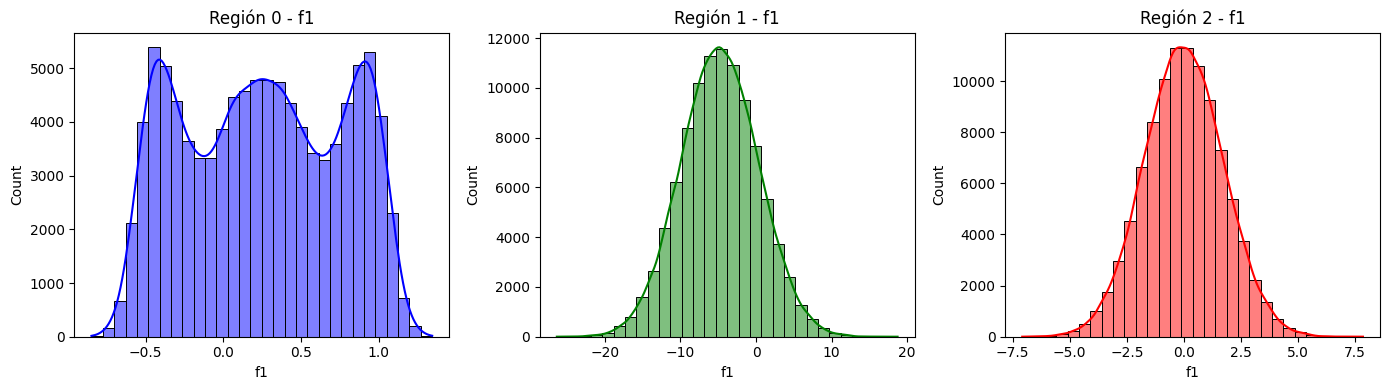

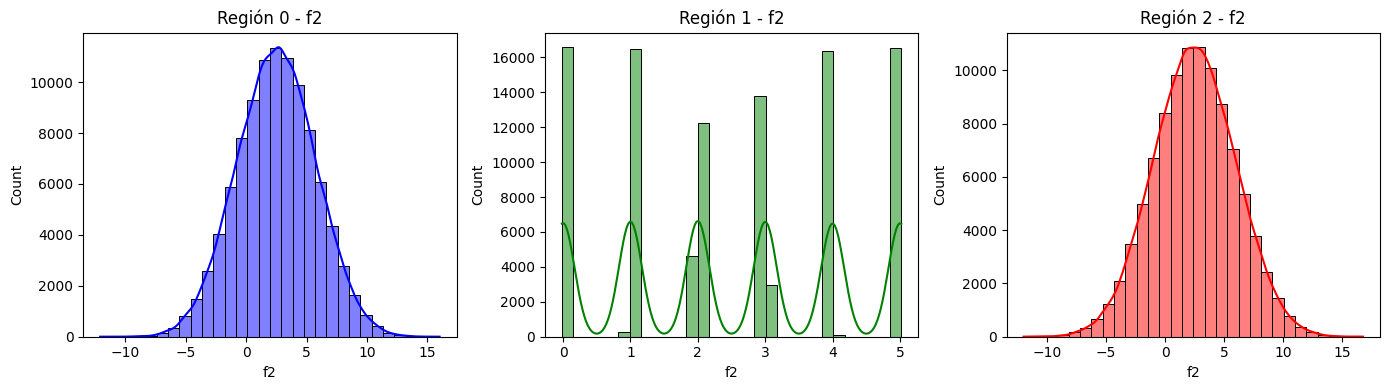

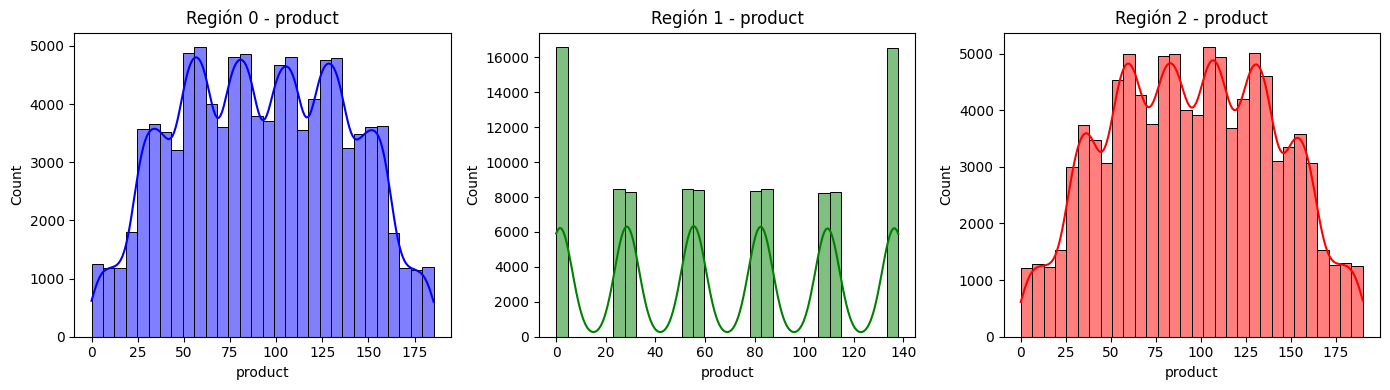

In [15]:
# Visualizar distribuciones de las características y la variable objetivo
features = ['f0', 'f1', 'f2', 'product']

for feature in features:
    plt.figure(figsize=(14, 4))
    
    # Histograma para cada región
    plt.subplot(1, 3, 1)
    sns.histplot(data_region_0[feature], kde=True, bins=30, color='blue')
    plt.title(f'Región 0 - {feature}')
    
    plt.subplot(1, 3, 2)
    sns.histplot(data_region_1[feature], kde=True, bins=30, color='green')
    plt.title(f'Región 1 - {feature}')
    
    plt.subplot(1, 3, 3)
    sns.histplot(data_region_2[feature], kde=True, bins=30, color='red')
    plt.title(f'Región 2 - {feature}')
    
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Aunque el plot está muy bien, recuerda acompañar estos con comentarios y conclusiones al respecto.

</div>

Correlaciones - Región 0


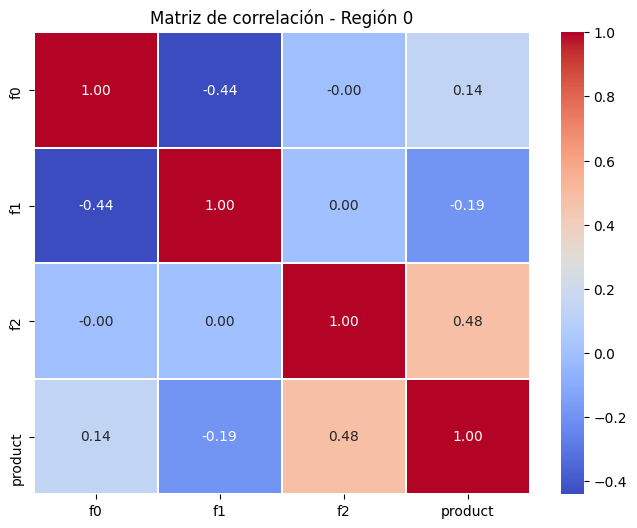

Correlaciones - Región 1


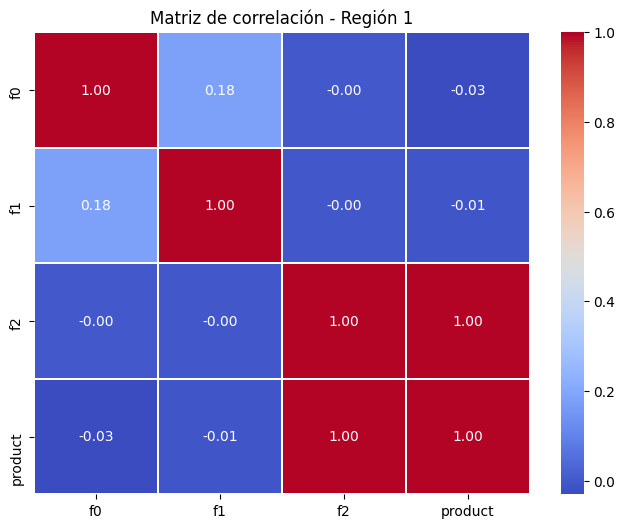

Correlaciones - Región 2


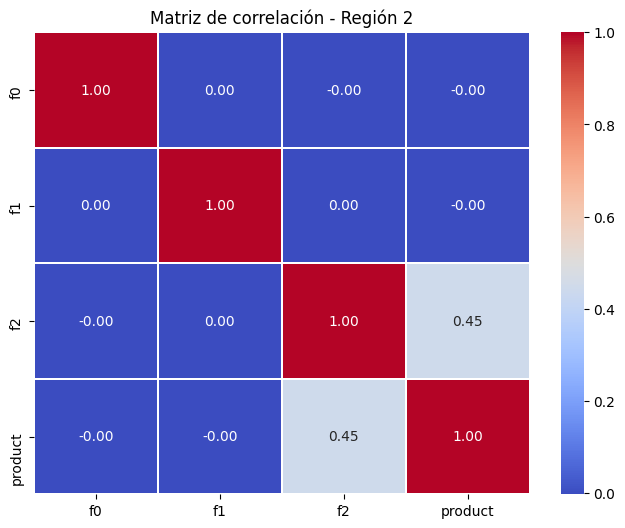

In [16]:
# Función para calcular y graficar correlaciones
def plot_correlation(data, region_name):
    plt.figure(figsize=(8, 6))
    correlation = data.corr()  # Matriz de correlación
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Matriz de correlación - {region_name}')
    plt.show()

# Calcular y graficar correlaciones para cada región
print("Correlaciones - Región 0")
plot_correlation(data_region_0, "Región 0")

print("Correlaciones - Región 1")
plot_correlation(data_region_1, "Región 1")

print("Correlaciones - Región 2")
plot_correlation(data_region_2, "Región 2")

<p><span style="color: #00ff00;"><strong>Conclusi&oacute;n</strong></span>: Region 1. En esta regi&oacute;n, las correlaciones son en su mayor&iacute;a d&eacute;biles, excepto por la correlaci&oacute;n perfecta entre f2 y el producto. Esto sugiere que f2 es un determinante clave del producto, mientras que las otras variables tienen poco impacto.</p>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto!

</div>

<h2><strong>Entrenamiento de modelos para cada regi&oacute;n&nbsp;</strong></h2>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has dividido los datos correctamente en conjuntos de entrenamiento y validación, manteniendo una proporción de 80%-20% entre los conjuntos de entrenamiento y validación. 

</div>

In [17]:
# Función para entrenar y evaluar un modelo
def train_and_evaluate(region_data, features, target, region_name):
    # Dividir los datos en entrenamiento y prueba
    X = region_data[features]
    y = region_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Resultados para {region_name}:")
    print(f"- MAE: {mae:.2f}")
    print(f"- RMSE: {rmse:.2f}")
    print("-" * 30)
    
    return model

# Entrenar y evaluar modelos para cada región
print("Modelo para Región 0")
model_region_0 = train_and_evaluate(data_region_0, features=['f2'], target='product', region_name="Región 0")

print("Modelo para Región 1")
model_region_1 = train_and_evaluate(data_region_1, features=['f0', 'f1', 'f2'], target='product', region_name="Región 1")

print("Modelo para Región 2")
model_region_2 = train_and_evaluate(data_region_2, features=['f1'], target='product', region_name="Región 2")


Modelo para Región 0
Resultados para Región 0:
- MAE: 31.62
- RMSE: 38.59
------------------------------
Modelo para Región 1
Resultados para Región 1:
- MAE: 0.72
- RMSE: 0.89
------------------------------
Modelo para Región 2
Resultados para Región 2:
- MAE: 37.75
- RMSE: 44.70
------------------------------


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente enfoque! Entrenar un modelo de regresión por separado para cada región permite capturar variaciones específicas en los datos, lo que puede mejorar la precisión de las predicciones.

</div>

<h2><strong>C&aacute;lculo de ganancias&nbsp;</strong></h2>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda que puede ser muy util el uso de constantes para estos valores clave. Establecer constantes es importante para mantener la claridad y la facilidad de modificación en el código. 
</div>

In [24]:
# Función para calcular ganancias
def calculate_profit(predictions, target, budget=100_000_000, cost_per_unit=4_500):
    top_200_indices = predictions.argsort()[-200:][::-1]
    selected_reserves = target.iloc[top_200_indices]
    
    revenue = selected_reserves.sum() * cost_per_unit
    profit = revenue - budget
    
    return profit, selected_reserves.mean()

# Evaluar ganancias para cada región
def evaluate_regions(predictions_list, target_list, region_names):
    for i, region in enumerate(region_names):
        profit, avg_reserves = calculate_profit(predictions_list[i], target_list[i])
        print(f"Región {region}:")
        print(f"- Ganancia total: ${profit / 1_000_000:.2f} millones")
        print(f"- Promedio de reservas seleccionadas: {avg_reserves:.2f} unidades")
        print("-" * 30)



<h2><strong>An&aacute;lisis de riesgo&nbsp;</strong></h2>

In [25]:
# Análisis de riesgos con bootstrapping
def bootstrap_profit(predictions, target, iterations=1000, budget=100_000_000, cost_per_unit=4_500):
    np.random.seed(42)
    profits = []
    
    for _ in range(iterations):
        sampled_indices = np.random.choice(len(predictions), 200, replace=True)
        sampled_reserves = target.iloc[sampled_indices]
        
        revenue = sampled_reserves.sum() * cost_per_unit
        profit = revenue - budget
        profits.append(profit)
    
    profits = np.array(profits)
    mean_profit = profits.mean()
    lower_bound = np.percentile(profits, 2.5)
    upper_bound = np.percentile(profits, 97.5)
    risk_of_loss = (profits < 0).mean()
    
    return mean_profit, lower_bound, upper_bound, risk_of_loss

def analyze_regions_with_bootstrap(predictions_list, target_list, region_names):
    for i, region in enumerate(region_names):
        mean_profit, lower, upper, risk = bootstrap_profit(predictions_list[i], target_list[i])
        print(f"Región {region}:")
        print(f"- Beneficio promedio: ${mean_profit / 1_000_000:.2f} millones")
        print(f"- Intervalo de confianza del 95%: (${lower / 1_000_000:.2f}, ${upper / 1_000_000:.2f}) millones")
        print(f"- Riesgo de pérdidas: {risk * 100:.2f}%")
        print("-" * 30)



In [26]:
# Evaluar ganancias y riesgos
predictions_list = [predictions_region_0, predictions_region_1, predictions_region_2]
target_list = [target_region_0, target_region_1, target_region_2]
region_names = ["Región 0", "Región 1", "Región 2"]

print("Cálculo de ganancias:")
evaluate_regions(predictions_list, target_list, region_names)

print("\nAnálisis de riesgos:")
analyze_regions_with_bootstrap(predictions_list, target_list, region_names)

Cálculo de ganancias:
Región Región 0:
- Ganancia total: $25.42 millones
- Promedio de reservas seleccionadas: 139.35 unidades
------------------------------
Región Región 1:
- Ganancia total: $24.15 millones
- Promedio de reservas seleccionadas: 137.95 unidades
------------------------------
Región Región 2:
- Ganancia total: $1.68 millones
- Promedio de reservas seleccionadas: 112.97 unidades
------------------------------

Análisis de riesgos:
Región Región 0:
- Beneficio promedio: $-16.91 millones
- Intervalo de confianza del 95%: ($-22.10, $-11.70) millones
- Riesgo de pérdidas: 100.00%
------------------------------
Región Región 1:
- Beneficio promedio: $-38.09 millones
- Intervalo de confianza del 95%: ($-44.18, $-32.54) millones
- Riesgo de pérdidas: 100.00%
------------------------------
Región Región 2:
- Beneficio promedio: $-14.30 millones
- Intervalo de confianza del 95%: ($-19.60, $-8.89) millones
- Riesgo de pérdidas: 100.00%
------------------------------


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen trabajo Cesar! 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Sin embargo, si presentas algunos errores leves en los cálculos, lo que te lleva a conclusiones incorrectas. 

Por ejemplo, un riesgo del 100% no sería correcto. Por otro lado, si que habrían beneficios potenciales en las regiones. 

Sin embargo, considero que en general tienes un muy buen código y proceso resolutivo.

</div>

</div>

<h3><strong>Conclusiones generales</strong></h3>
<ol>
<li>
<p><strong>Todas las regiones tienen un riesgo de p&eacute;rdidas del 100%</strong>,&nbsp;</p>
</li>
<li>
<p><strong>La Regi&oacute;n 0 es la mejor opci&oacute;n relativa:</strong></p>
<ul>
<li>Tiene la ganancia total m&aacute;s alta y el menor beneficio promedio negativo en el an&aacute;lisis de riesgos.</li>
<li>Sin embargo, sigue siendo una inversi&oacute;n riesgosa.</li>
</ul>
</li>
<li>
<p><strong>La Regi&oacute;n 1 tiene el peor desempe&ntilde;o en el an&aacute;lisis de riesgos:</strong></p>
<ul>
<li>Su beneficio promedio es el m&aacute;s negativo, y el intervalo de confianza sugiere p&eacute;rdidas significativas.</li>
</ul>
</li>
<li>
<p><strong>La Regi&oacute;n 2 muestra el menor rendimiento tanto en ganancias totales como en reservas promedio seleccionadas.</strong></p>
</li>
</ol>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Cesar! Tu trabajo es muy bueno.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Te he dejado algunos comentarios que sería bueno que mires.

</div>

Has completado todos los items necesarios para aprobar la entrega.

</div>